In [22]:

# import libraries
import pandas as pd
pd.set_option('display.max_columns', 120) # display max 120 columns
import numpy as np

# data visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
%matplotlib inline
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association


from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [23]:
# read the data

# Read and Merge Data - basic - remove nan / duplicate values

In [25]:
def load_merge_date(demo_path, client_path, web_path1, web_path2) -> pd.DataFrame:
    """
    Load and merge data from multiple sources
    """
    # load data
    demo_df= pd.read_csv(demo_path)
    client_df= pd.read_csv(client_path)
    web_df1= pd.read_csv(web_path1)
    web_df2= pd.read_csv(web_path2)

    # concat web data
    concat_web_df= pd.concat([web_df1, web_df2])

    # merge data
    
    merged_web_client_df= pd.merge(concat_web_df,client_df, on='client_id', how='inner')
    final_df= pd.merge(merged_web_client_df, demo_df, on='client_id', how='left')

    return final_df

def clean_data(final_df) -> pd.DataFrame:
    """
    drop duplicates and missing values
    """
    # drop duplicates
    final_df.drop_duplicates(inplace=True)

    # drop missing values
    final_df.dropna(inplace=True)

    # change column names to lower case
    final_df.columns = final_df.columns.str.lower()

    # drop columns gender = x
    final_df = final_df[final_df['gendr'] != 'X']

    return final_df


In [26]:
# Load the data

demo_path = '../Data/Raw/df_final_demo (1).txt'
client_path = '../Data/Raw/df_final_experiment_clients.txt'
web_path1 = '../Data/Raw/df_final_web_data_pt_1.txt'
web_path2 = '../Data/Raw/df_final_web_data_pt_2.txt'

final_df = load_merge_date(demo_path, client_path, web_path1, web_path2)
clean_data(final_df)

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417650,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
417651,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
417652,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
417653,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


In [27]:
def save_dataframe_to_csv(dataframe, file_path):
    dataframe.to_csv(file_path, index=False)

In [28]:
save_dataframe_to_csv(final_df, '/Users/skyler/Documents/GitHub/Second-big-project-/Project-Two-Big/Data/Cleaned/final_df.csv')

#### In the dataframe df, the numerical variables are:

clnt_tenure_yr - discrete variables

clnt_tenure_mnth  - discrete variables

clnt_age - discrete variables

num_accts - discrete variables

calls_6_mnth - discrete variables

logons_6_mnth - discrete variables


bal - continuous variable 


#### The categorical variables are:

variation - nominal variable

gendr - ordinal variable

# EDA about demo dataset 


Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?


In [29]:
# read df_cleaned
final_df = pd.read_csv('../Data/Cleaned/final_df.csv')
final_df

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317118,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
317119,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
317120,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
317121,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


## Numerical EDA 

In [30]:
# create a function to create a pairplot

def create_pairplot(dataframe):
    sns.pairplot(dataframe, vars=['clnt_age', 'num_accts', 'clnt_tenure_yr', 'bal', 'calls_6_mnth', 'logons_6_mnth'], 
             diag_kind='kde', plot_kws={'color':'skyblue', 'alpha':0.5}, 
             diag_kws={'color':'skyblue', 'alpha':0.5})
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

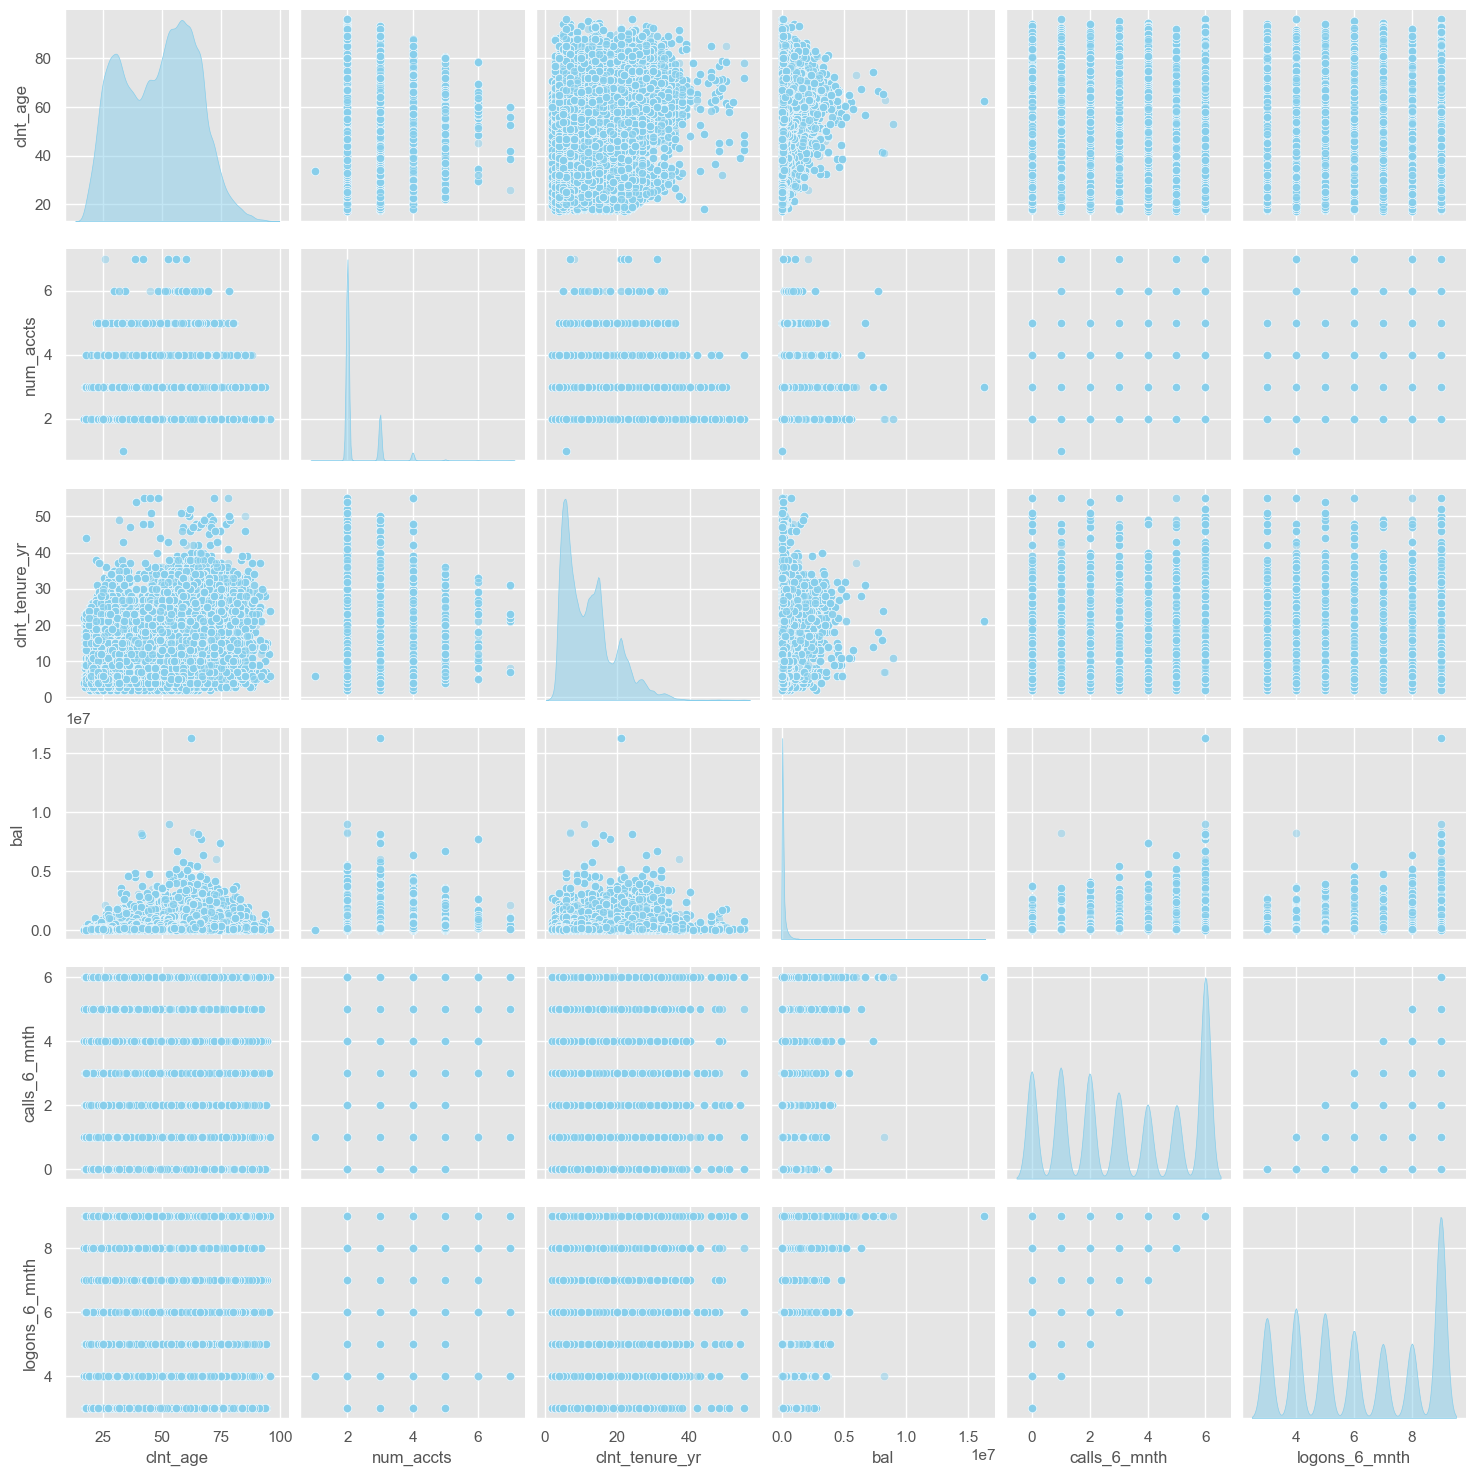

In [31]:
create_pairplot(final_df)

<Axes: title={'center': 'Top 10 Number of Accounts'}, xlabel='Top 10 Number of Accounts', ylabel='Count'>

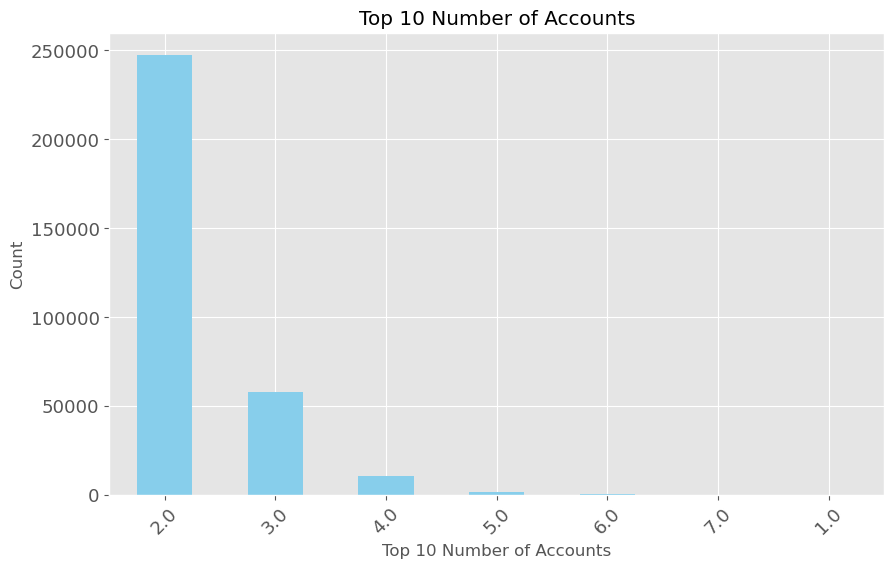

In [10]:
# create a function to create a plot for num_accounts
def generate_account_plot(dataframe):
    account_plot = dataframe['num_accts'].value_counts() \
        .head(10) \
        .plot(kind='bar', figsize=(10, 6), color='skyblue', fontsize=13, rot=45, title='Top 10 Number of Accounts')
    account_plot.set_xlabel('Top 10 Number of Accounts')
    account_plot.set_ylabel('Count')
    return account_plot

generate_account_plot(final_df)


Text(0, 0.5, 'Count')

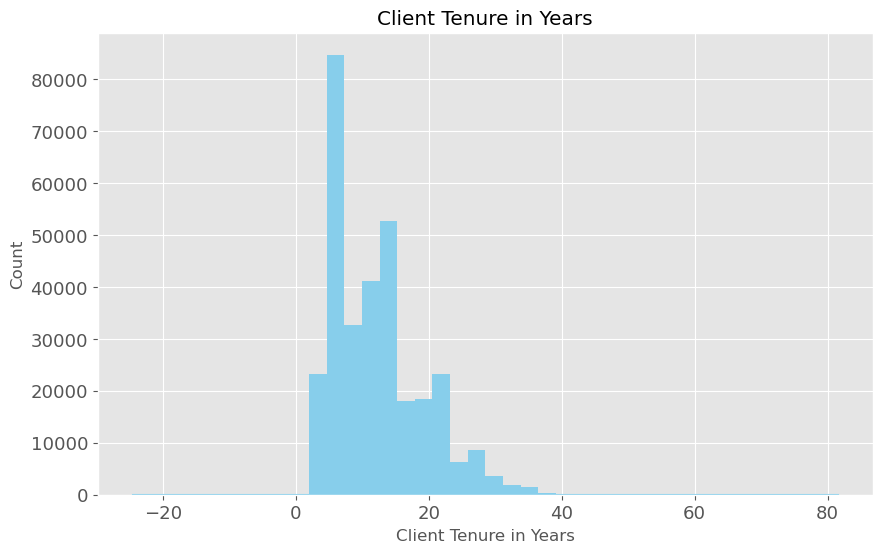

In [11]:
final_df['clnt_tenure_yr'].plot(kind='hist', bins=20, color='skyblue', figsize=(10, 6), fontsize=13, title='Client Tenure in Years')
plt.xlabel('Client Tenure in Years')
plt.ylabel('Count')

final_df['clnt_tenure_yr'].plot(kind='kde', color='skyblue', figsize=(10, 6), fontsize=13, title='Client Tenure in Years')
plt.xlabel('Client Tenure in Years')
plt.ylabel('Count')

In [32]:
# create a dataframe for the demographic data
df_demo = final_df[['client_id', 'date_time', 'variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']]
df_demo.to_csv('../Data/Cleaned/df_demo.csv', index=False)

# create two dataframes based on the variation
df_control = df_demo[df_demo['variation'] == 'Control']
df_test = df_demo[df_demo['variation'] == 'Test']

# save the dataframes to csv files
df_control.to_csv('../Data/Cleaned/df_control.csv', index=False)
df_test.to_csv('../Data/Cleaned/df_test.csv', index=False)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

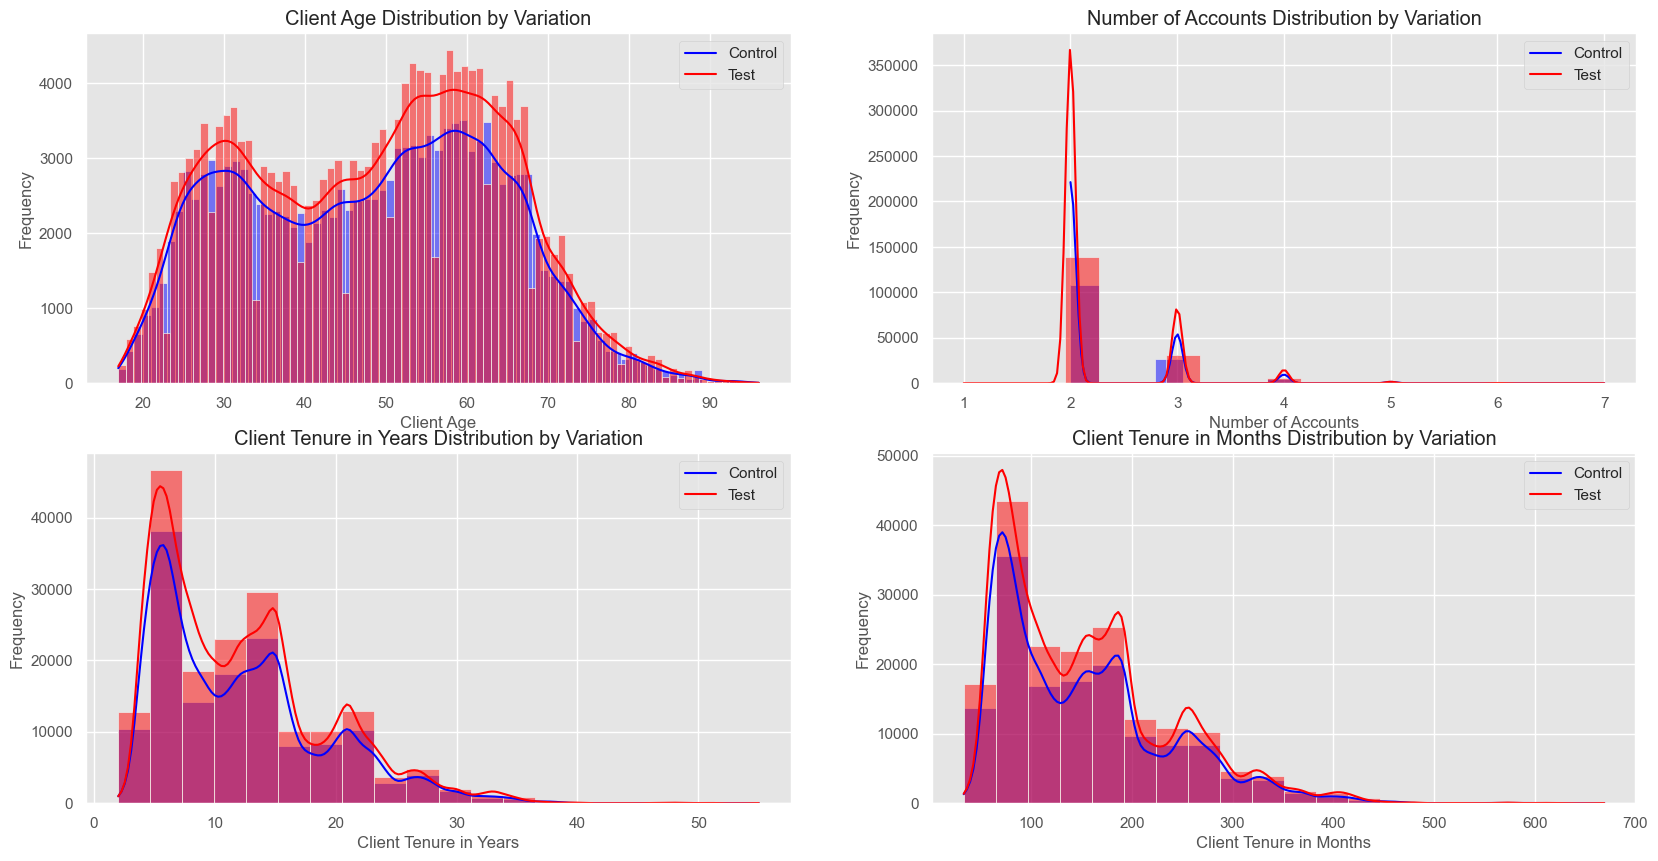

In [33]:
# using stacked histogram to compare the difference between the two groups, for clnt_age and num_accts, and clin_tenure_yr, clnt_tenure_mnth

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(df_control['clnt_age'], kde=True, ax=axes[0, 0], color='blue', alpha=0.5)
sns.histplot(df_test['clnt_age'], kde=True, ax=axes[0, 0], color='Red', alpha=0.5)

sns.histplot(df_control['num_accts'], kde=True, ax=axes[0, 1], color='blue', alpha=0.5)
sns.histplot(df_test['num_accts'], kde=True, ax=axes[0, 1], color='red', alpha=0.5)

sns.histplot(df_control['clnt_tenure_yr'], kde=True, ax=axes[1, 0], bins=20, color='blue', alpha=0.5)
sns.histplot(df_test['clnt_tenure_yr'], kde=True, ax=axes[1, 0],bins=20, color='red', alpha=0.5)

sns.histplot(df_control['clnt_tenure_mnth'], kde=True, ax=axes[1, 1],bins=20, color='blue', alpha=0.5)
sns.histplot(df_test['clnt_tenure_mnth'], kde=True, ax=axes[1, 1],bins=20, color='red', alpha=0.5)
             
# add labels

axes[0, 0].set_xlabel('Client Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Client Age Distribution by Variation')

axes[0, 1].set_xlabel('Number of Accounts')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Number of Accounts Distribution by Variation')

axes[1, 0].set_xlabel('Client Tenure in Years')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Client Tenure in Years Distribution by Variation')

axes[1, 1].set_xlabel('Client Tenure in Months')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Client Tenure in Months Distribution by Variation')

# add legend

axes[0, 0].legend(['Control', 'Test'])
axes[0, 1].legend(['Control', 'Test'])
axes[1, 0].legend(['Control', 'Test'])
axes[1, 1].legend(['Control', 'Test'])


## check if client age is normal distributed 

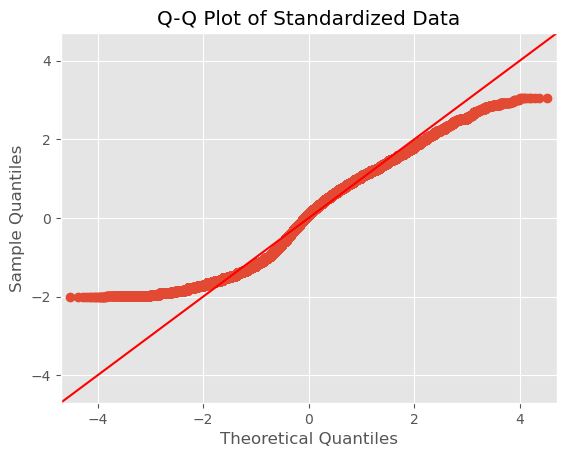

In [14]:

data = final_df['clnt_age'].dropna()

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()

fig = sm.qqplot(data_standardized, line='45')
plt.title('Q-Q Plot of Standardized Data')
plt.show()

Text(0, 0.5, 'Number of Accounts')

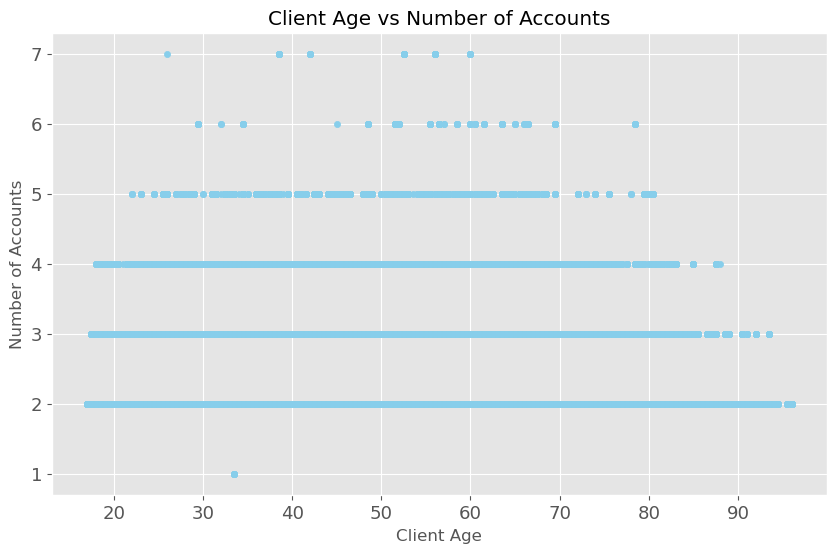

In [15]:
final_df.plot(kind='scatter', x='clnt_age', y='num_accts', figsize=(10, 6), color='skyblue', fontsize=13, title='Client Age vs Number of Accounts')
plt.xlabel('Client Age')
plt.ylabel('Number of Accounts')

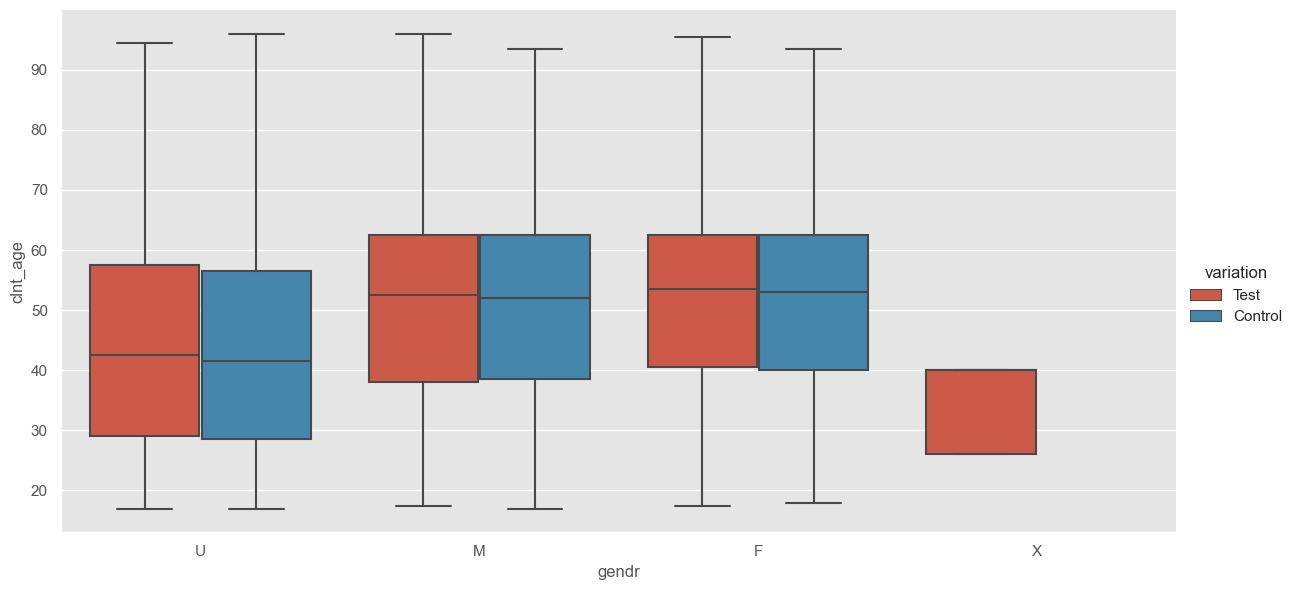

In [34]:
# use catplot to show the age distribution by variation
sns.catplot(x='gendr', y='clnt_age', hue='variation', data=final_df, kind='box', height=6, aspect=2)

### CLIENT Gender AND VARIANCE ANALYSIS

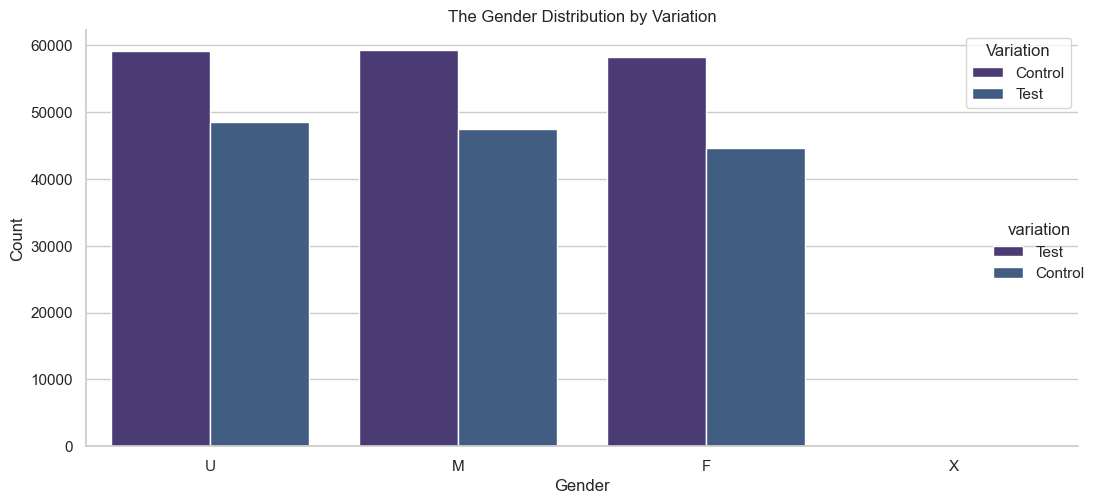

In [35]:
# create a grouped bar chart to compare gender distribution by variation

sns.set_theme(style="whitegrid", palette='viridis')
sns.catplot(x='gendr', kind='count', hue='variation', data=df_demo, height=5, aspect=2)

# add labels
plt.xlabel('Gender')
plt.ylabel('Count')
# make visual tight
plt.tight_layout()

# add title
plt.title('The Gender Distribution by Variation')

# add legend
plt.legend(title='Variation', loc='upper right', labels=['Control', 'Test'])

In [36]:
pd.crosstab(df_demo['gendr'], df_demo['variation'])

variation,Control,Test
gendr,,
F,44629,58169
M,47415,59288
U,48438,59176
X,0,8


## TO Test the correltion bewteen gender and variation and test the strength of the correltion 

Because there are two categories variables, therefore, I will be using chi2_contingency to test the correltion

In [37]:
# create the hypothesis test
H0 = 'there is no correlation between gender and variation' --rejected 
H1 = 'there is a correlation between gender and variation' --accepted

NameError: name 'rejected' is not defined

In [38]:
# create a cross tab for the gender and variation
gendr_variation = pd.crosstab(df_demo['gendr'], df_demo['variation'])

# use chi-square test to determine if the age and variation are independent
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_demo['gendr'], df_demo['variation']))
p

2.318985124376399e-13

In [39]:
# explain the result
if p < 0.05:
    print('There is a correlation between the gender and variation')
else:
    print('There is no correlation difference between the gender and variation')

There is a correlation between the gender and variation


### because there is a correltion between gender and variation, then following by using cramer to test the strength of the correltion

In [40]:
# using cremers_v to measure the correlation between 

from scipy.stats.contingency import association
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(gendr_variation, method="cramer")
print(association(gendr_variation, method="cramer"))


# result 
if association(gendr_variation, method="cramer") > 0.5:
    print('There is a strong correlation between gender and variation')
else:
    print('There is a weak correlation between gender and variation')


     

0.013970032724017525
There is a weak correlation between gender and variation


## Check the EDA of calls_6_mth and Logons_6_mth

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

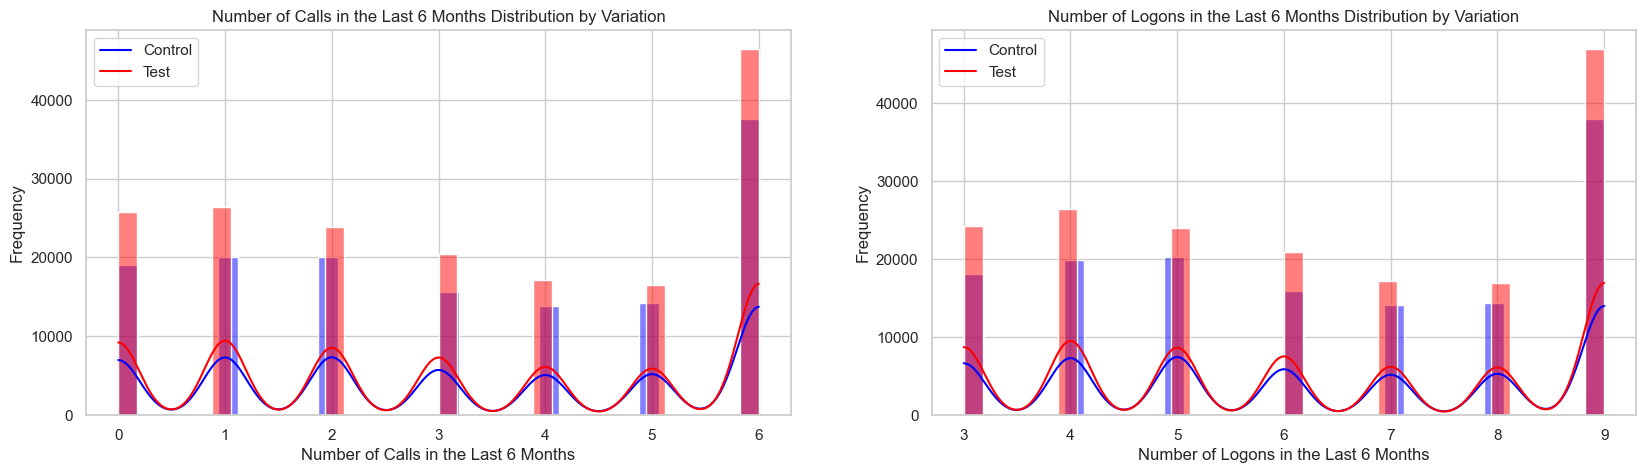

In [41]:
# calls_6_mnth: Records the number of times the client reached out over a call in the past six months.
# logons_6_mnth: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.

#using displot to compare the difference between the two groups, for calls_6_mnth and logons_6_mnth
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(df_control['calls_6_mnth'], kde=True, ax=axes[0], color='blue', alpha=0.5)
sns.histplot(df_test['calls_6_mnth'], kde=True, ax=axes[0], color='red', alpha=0.5)

sns.histplot(df_control['logons_6_mnth'], kde=True, ax=axes[1], color='blue', alpha=0.5)
sns.histplot(df_test['logons_6_mnth'], kde=True, ax=axes[1], color='red', alpha=0.5)

# add labels
axes[0].set_xlabel('Number of Calls in the Last 6 Months')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Number of Calls in the Last 6 Months Distribution by Variation')

axes[1].set_xlabel('Number of Logons in the Last 6 Months')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Number of Logons in the Last 6 Months Distribution by Variation')

# add legend
axes[0].legend(['Control', 'Test'])
axes[1].legend(['Control', 'Test'])


## Variation distribution

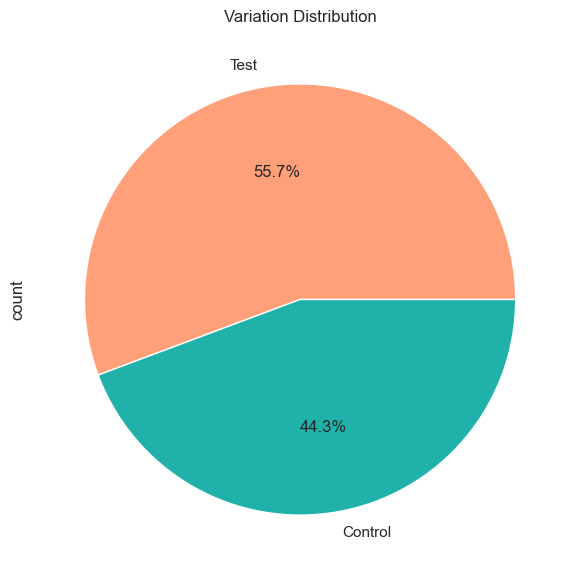

In [42]:
# pie chart to show the distribution of the variation
plt.figure(figsize=(10, 7))
df_demo['variation'].value_counts(dropna=False).plot.pie(autopct='%1.1f%%',colors=['#FFA07A', '#20B2AA', '#87CEFA'])
plt.title('Variation Distribution')
plt.show()

## Checking the correlation between numerical variables

In [ ]:
cor_numerical = df_demo[['clnt_tenure_yr', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']].corr()

<Axes: >

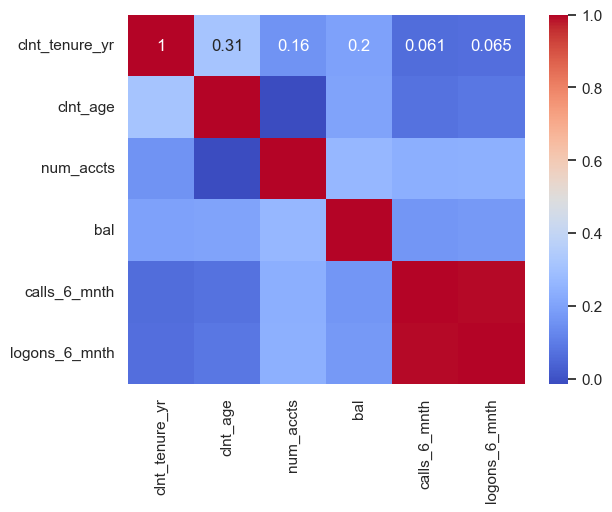

In [ ]:
sns.heatmap(cor_numerical, annot=True, cmap='coolwarm')


### Explain the result
The heatmap shows that there is a strong correlation between the number of accounts and the balance.

There is also a moderate correlation between the number of calls in the last 6 months and the number of logons in the last 6 months.


The heatmap shows the correlation between the numerical variables. The correlation ranges from -1 to 1.

A correlation of 1 indicates a perfect positive correlation, while a correlation of -1 indicates a perfect negative correlation.



chi2_contingency == two categories varaiable  -- cramera -- test it out the strength of the correlation 

pearsonr = two numerical variables 

In [43]:
df_demo['num_accts'].unique()

df_demo.isnull().sum()

# Remove rows with NaN values
df_demo_clean = df_demo.dropna()

from scipy.stats import pearsonr

# Calculate Pearson correlation
corr, p = pearsonr(df_demo_clean['num_accts'], df_demo_clean['bal'])
corr, p

# h0 = there is no correlation between the number of accounts and balance
# h1 = there is a correlation between the number of accounts and balance
# explain the pearson value
if p < 0.05:
    print('there is a correlation between the number of accounts and balance')
else:
    print('The correlation between the number of accounts and balance is weak')
corr

there is a correlation between the number of accounts and balance


0.264194035676114

qqplot is for numerical continuious variable to see if it is close to normal disturibtion 

In [ ]:
final_df.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

# KPIS

## Caculate the completion rate by counting how many confirm by client_id



### The defination of completion rate:  When a client has reach to confirm step which is process_step is confrim, meaning the client has complete the process, only client only has one confirm 

In [44]:
#read data and merge data df_final_web_data_pt_1.txt and df_final_web_data_pt_2.txt
web1 = pd.read_csv('../Data/Raw/df_final_web_data_pt_1.txt')
web2 = pd.read_csv('../Data/Raw/df_final_web_data_pt_2.txt')

web = pd.concat([web1, web2])


In [ ]:
final_df.head(20)

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0


In [45]:

# add a new column to show the number of steps
final_df['num_steps'] = final_df['process_step'].map({'start':0, 'step_1':1, 'step_2':2, 'step_3':3, 'confirm':4})

# df sorted by client_id and date
final_df = final_df.sort_values(by=['client_id', 'date_time'])

In [46]:
#read df_final_experiment_clients
df_clients = pd.read_csv('../Data/Raw/df_final_experiment_clients.txt')
df_clients.drop_duplicates(inplace=True)
df_clients.dropna(inplace=True)


In [47]:
# count the number of steps for each client
df_count_step = final_df.groupby(['client_id', 'num_steps']).size().unstack(fill_value=0)
# merge the data with the demographic data
df_num_steps = pd.merge(df_count_step, df_clients, on='client_id', how='left')


# if a client_id, cloumn 4 value >=1 then the client has completed the process
df_num_steps['completed'] = df_num_steps[4] >= 1
df_num_steps['completed'].value_counts()

# calculate the percentage of clients who completed the process
completed_clients = df_num_steps[df_num_steps['completed'] == True]
not_completed_clients = df_num_steps[df_num_steps['completed'] == False]

# calculate the percentage of clients who completed the process 
completed_percentage = (completed_clients['client_id'].nunique() / final_df['client_id'].nunique()) * 100

# calculate the percentage of clients who did not complete the process
not_completed_percentage = (not_completed_clients['client_id'].nunique() / final_df['client_id'].nunique()) * 100

completed_percentage, not_completed_percentage

(67.56194663972904, 32.43805336027096)

In [ ]:
df_num_steps

,client_id,0,1,2,3,4,Variation,completed
0,555,1,1,1,1,1,Test,True
1,647,1,1,1,1,1,Test,True
2,934,4,0,0,0,0,Test,False
3,1028,1,5,2,1,0,Control,False
4,1104,2,0,0,0,0,Control,False
...,...,...,...,...,...,...,...,...
50482,9999150,2,1,0,0,0,Test,False
50483,9999400,1,1,1,1,1,Test,True
50484,9999626,1,1,0,0,0,Test,False
50485,9999729,4,3,2,1,1,Test,True


In [49]:

# delete the user who has first step_4 is confirm

final_df.sort_values(by=['client_id', 'date_time'], inplace=True)

final_df['visit_confirmed'] = final_df.groupby(['visit_id'])['process_step'].transform(lambda x: x.eq('confirm').any())



In [50]:

final_df['visitor_confirm'] =final_df.groupby('visitor_id')['visit_confirmed'].transform(lambda x: x.eq(True).any())



In [51]:
# Group by 'visitor_id' and count unique 'visit_id's 
visitor_visit_count = final_df.groupby('visitor_id')['visit_id'].nunique() 
# Filter visitors with multiple 
# 'visit_id's 

multiple_visits = visitor_visit_count[visitor_visit_count > 1].index

multiple_visits 

Index(['10008560_69050398598', '100189756_32488226026',
       '100265469_84689631452', '100305976_41869444020',
       '100310230_29233932752', '100330771_15486329575',
       '100371981_39263098807', '100378942_17272524450',
       '10039150_71513698940', '100412047_62518580122',
       ...
       '999209154_36179844229', '999361354_96684462911',
       '999480171_7601721336', '999646146_32597722408',
       '999660936_10854917219', '999669334_52101408980',
       '999670568_58336189268', '999861021_97674299330',
       '999986924_89514756905', '999997533_50295491521'],
      dtype='object', name='visitor_id', length=9889)

In [52]:
unique_visitor_confirm = final_df[final_df['visitor_confirm'] == True]['visitor_id'].unique()
unique_visitor = final_df['visitor_id'].unique()

In [54]:
completion_rate = len(unique_visitor_confirm) / len(unique_visitor) * 100
completion_rate



62.345965639175624

In [55]:
# check the completion rate by variation
df_test = final_df[final_df['variation'] == 'Test']
df_control = final_df[final_df['variation'] == 'Control']

unique_visitor_confirm_test = df_test[df_test['visitor_confirm'] == True]['visitor_id'].unique()
unique_visitor_test = df_test['visitor_id'].unique()

completion_rate_test = len(unique_visitor_confirm_test) / len(unique_visitor_test) * 100
completion_rate_test

unique_visitor_confirm_control = df_control[df_control['visitor_confirm'] == True]['visitor_id'].unique()
unique_visitor_control = df_control['visitor_id'].unique()

completion_rate_control = len(unique_visitor_confirm_control) / len(unique_visitor_control) * 100
completion_rate_control

59.289711088272234

In [56]:
completion_rate_test

65.2200080246088

In [57]:
completion_rate_control

59.289711088272234

In [60]:
final_df = final_df[final_df['visitor_id'].isin(multiple_visits)]
final_df.sort_values(by=['visitor_id']).head(5)



,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,num_steps,visit_confirmed,visitor_confirm
18902,762846,10008560_69050398598,248633003_84368331010_346467,step_2,2017-04-14 22:19:42,Control,14.0,172.0,63.5,M,2.0,340335.52,6.0,9.0,2,False,True
18898,762846,10008560_69050398598,312355704_26376649868_97900,step_1,2017-04-15 22:55:07,Control,14.0,172.0,63.5,M,2.0,340335.52,6.0,9.0,1,True,True
18897,762846,10008560_69050398598,312355704_26376649868_97900,step_2,2017-04-15 22:55:37,Control,14.0,172.0,63.5,M,2.0,340335.52,6.0,9.0,2,True,True
18896,762846,10008560_69050398598,312355704_26376649868_97900,step_3,2017-04-15 22:55:50,Control,14.0,172.0,63.5,M,2.0,340335.52,6.0,9.0,3,True,True
18895,762846,10008560_69050398598,312355704_26376649868_97900,confirm,2017-04-15 22:56:27,Control,14.0,172.0,63.5,M,2.0,340335.52,6.0,9.0,4,True,True


Text(0.5, 1.0, 'The Completed Percentage by Variation')

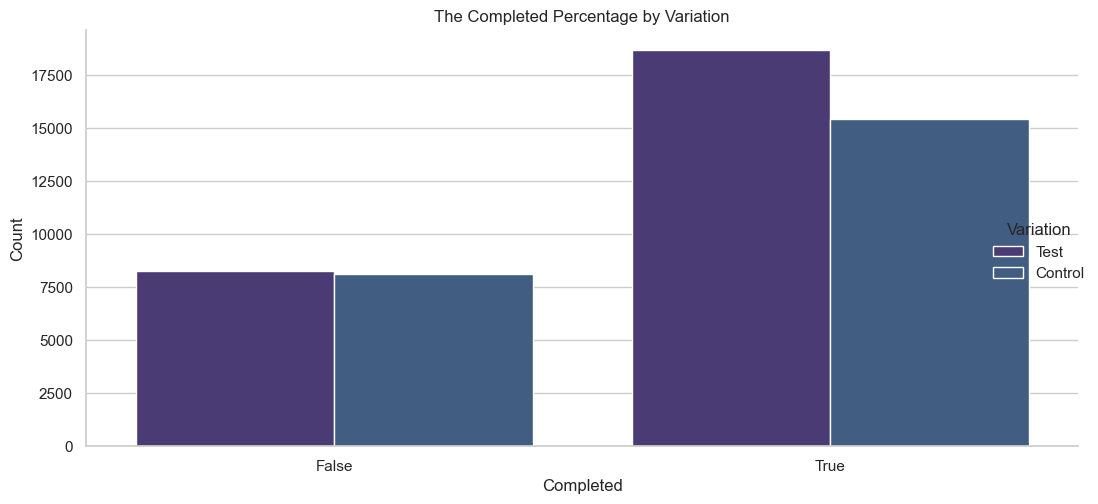

In [ ]:
# using grouped bar chart to completed precentage by variation
sns.set_theme(style="whitegrid", palette='viridis')
sns.catplot(x='completed', kind='count', hue='Variation', data=df_num_steps, height=5, aspect=2)

# add labels
plt.xlabel('Completed')
plt.ylabel('Count')
# make visual tight
plt.tight_layout()

# add title
plt.title('The Completed Percentage by Variation')

In [ ]:
# create a cross tab for the completed and variation
completed_variation = pd.crosstab(df_num_steps['completed'], df_num_steps['Variation'])
# add proportion of the completed and variation
completed_variation['prob_control'] = completed_variation['Control'] / completed_variation['Control'].sum()
completed_variation['prob_test'] = completed_variation['Test'] / completed_variation['Test'].sum()

completed_variation


Variation,Control,Test,prob_control,prob_test
completed,,,,
False,8098,8279,0.344215,0.307073
True,15428,18682,0.655785,0.692927


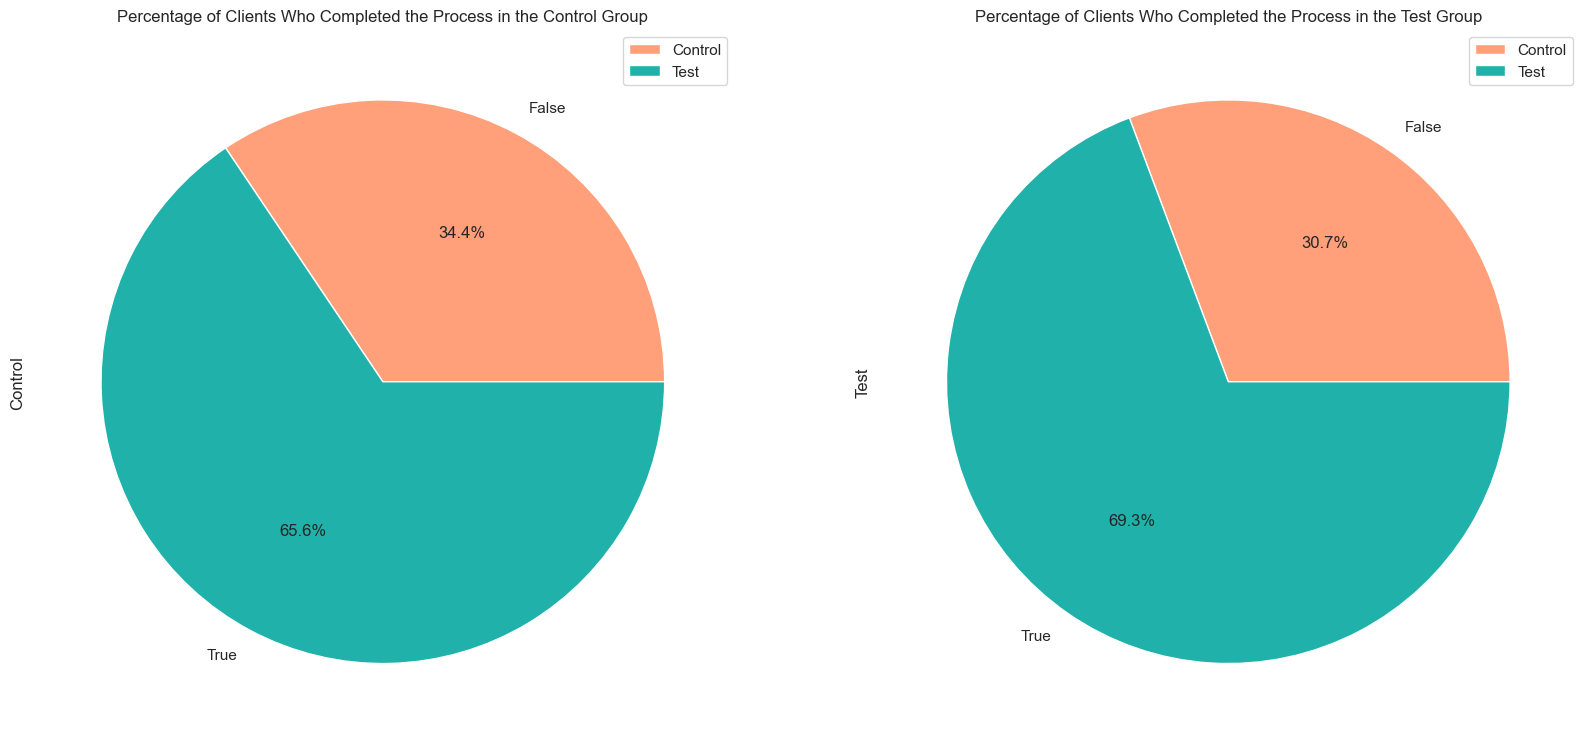

In [ ]:


# make pie charts to compare the percentage of clients who completed the process by control and test group
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
completed_variation['Control'].plot.pie(autopct='%1.1f%%', ax=axes[0], colors=['#FFA07A', '#20B2AA', '#87CEFA'])
axes[0].set_title('Percentage of Clients Who Completed the Process in the Control Group')

completed_variation['Test'].plot.pie(autopct='%1.1f%%', ax=axes[1], colors=['#FFA07A', '#20B2AA', '#87CEFA'])
axes[1].set_title('Percentage of Clients Who Completed the Process in the Test Group')

# add legend
axes[0].legend(['Control', 'Test'])
axes[1].legend(['Control', 'Test'])



In [ ]:
# merge df_num_steps with df_final_demo 1

df_final_demo = pd.read_csv('../Data/Raw/df_final_demo (1).txt')
df_num_steps_demo = pd.merge(df_num_steps, df_final_demo, on='client_id', how='left')
# give age a category by age range  and add a new column to show the category such as young, young adult, adult, senior
df_num_steps_demo['age_range'] = pd.cut(df_num_steps_demo['clnt_age'], bins=[0, 20, 40, 60, 80, 100], labels=['Young', 'Young Adult', 'Adult', 'Senior', 'Elderly'])

# lower case the column names
df_num_steps_demo.columns = df_num_steps_demo.columns.str.lower()

df_num_steps_demo

,client_id,NaN,NaN,NaN,NaN,NaN,variation,completed,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_range
0,555,1,1,1,1,1,Test,True,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Young Adult
1,647,1,1,1,1,1,Test,True,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Adult
2,934,4,0,0,0,0,Test,False,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,Adult
3,1028,1,5,2,1,0,Control,False,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Young Adult
4,1104,2,0,0,0,0,Control,False,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50482,9999150,2,1,0,0,0,Test,False,5.0,66.0,30.0,U,3.0,97141.71,6.0,9.0,Young Adult
50483,9999400,1,1,1,1,1,Test,True,7.0,86.0,28.5,U,2.0,51787.04,0.0,3.0,Young Adult
50484,9999626,1,1,0,0,0,Test,False,9.0,113.0,35.0,M,2.0,36642.88,6.0,9.0,Young Adult
50485,9999729,4,3,2,1,1,Test,True,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Young Adult


## Completion rate with other variables 

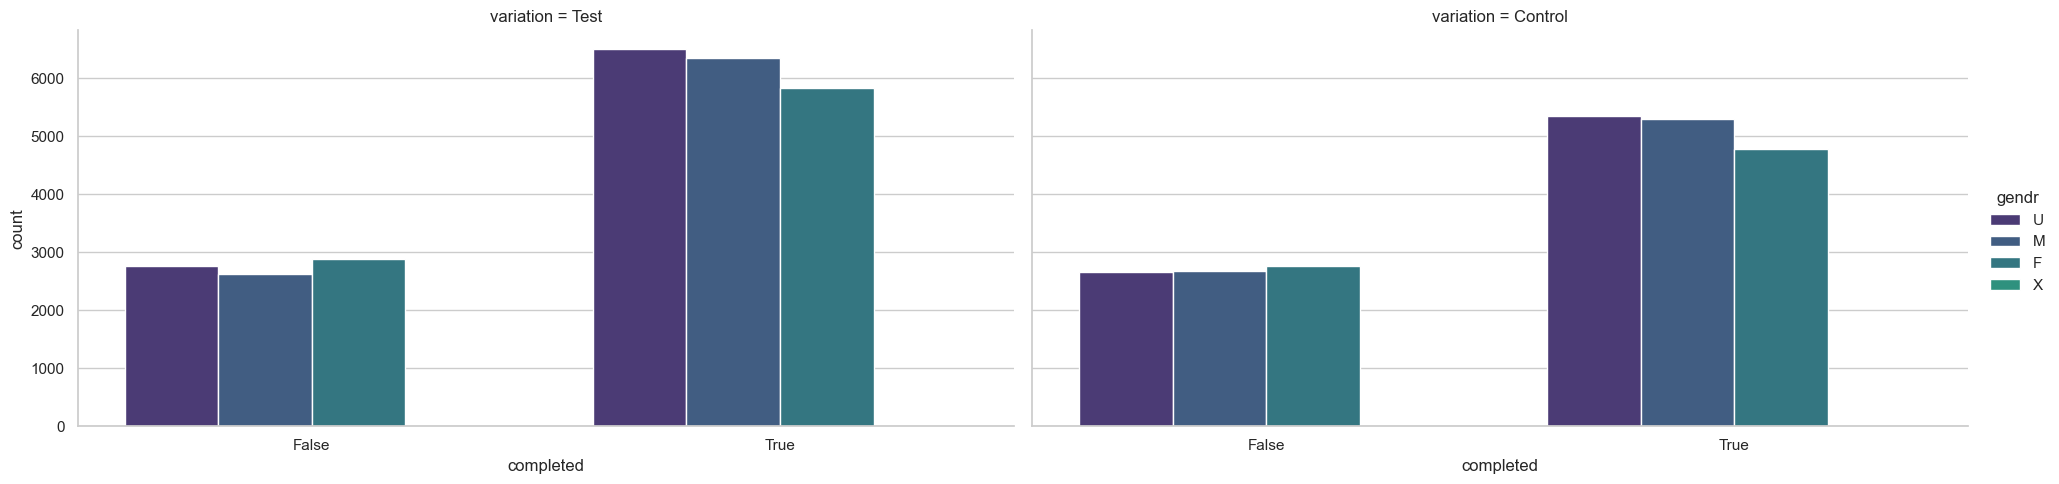

In [ ]:
sns.set_theme(style="whitegrid", palette='viridis')
sns.catplot(x='completed', kind='count', hue='gendr', col='variation', data=df_num_steps_demo, height=5, aspect=2)

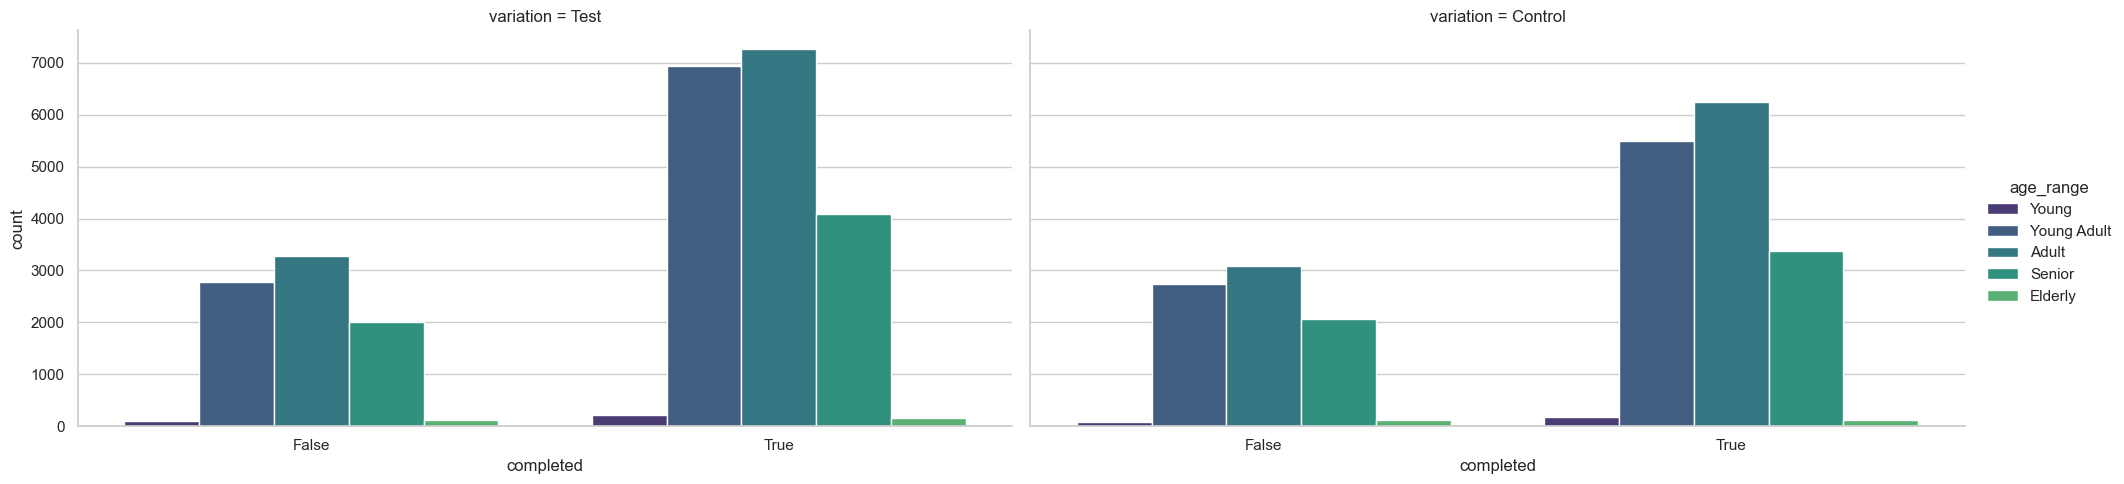

In [ ]:
sns.set_theme(style="whitegrid", palette='viridis')
sns.catplot(x='completed', kind='count', hue='age_range', col='variation', data=df_num_steps_demo, height=5, aspect=2)

## ADD THE TIME SPEND ON EACH STEP

In [61]:

# organzie the data by date_time
final_df['date_time'] = pd.to_datetime(final_df['date_time'])
#calculate the time difference by client_id
final_df['time_diff'] = np.where(final_df['visit_id'] != final_df['visit_id'].shift(1), 0, final_df.sort_values(['client_id', 'date_time']).groupby('client_id')['date_time'].diff().dt.total_seconds().fillna(0))

# add time spend column which is time_diff move up by one row
final_df['time_spend'] = final_df.groupby(["visit_id"])['time_diff'].shift(-1)

In [62]:
final_df

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,num_steps,visit_confirmed,visitor_confirm,time_diff,time_spend
249123,1104,194240915_18158000533,543158812_46395476577_767725,start,2017-06-12 07:49:18,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,0,False,False,0.0,NaN
249135,1104,194240915_18158000533,643221571_99977972121_69283,start,2017-06-20 22:31:33,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,0,False,False,0.0,NaN
232225,1186,446844663_31615102958,507052512_11309370126_442139,start,2017-04-08 15:59:16,Control,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0,0,False,False,0.0,NaN
232224,1186,446844663_31615102958,795373564_99931517312_810896,start,2017-04-08 18:05:02,Control,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0,0,False,False,0.0,11.0
232223,1186,446844663_31615102958,795373564_99931517312_810896,step_1,2017-04-08 18:05:13,Control,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0,1,False,False,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97106,9998964,502193753_63097042630,448452610_76147168193_961371,start,2017-04-05 23:45:50,Test,5.0,71.0,45.5,U,3.0,91766.49,6.0,9.0,0,False,True,0.0,NaN
97105,9998964,502193753_63097042630,699981922_52880598802_858635,step_1,2017-04-05 23:46:45,Test,5.0,71.0,45.5,U,3.0,91766.49,6.0,9.0,1,True,True,0.0,16.0
97104,9998964,502193753_63097042630,699981922_52880598802_858635,step_2,2017-04-05 23:47:01,Test,5.0,71.0,45.5,U,3.0,91766.49,6.0,9.0,2,True,True,16.0,107.0
97103,9998964,502193753_63097042630,699981922_52880598802_858635,step_3,2017-04-05 23:48:48,Test,5.0,71.0,45.5,U,3.0,91766.49,6.0,9.0,3,True,True,107.0,74.0


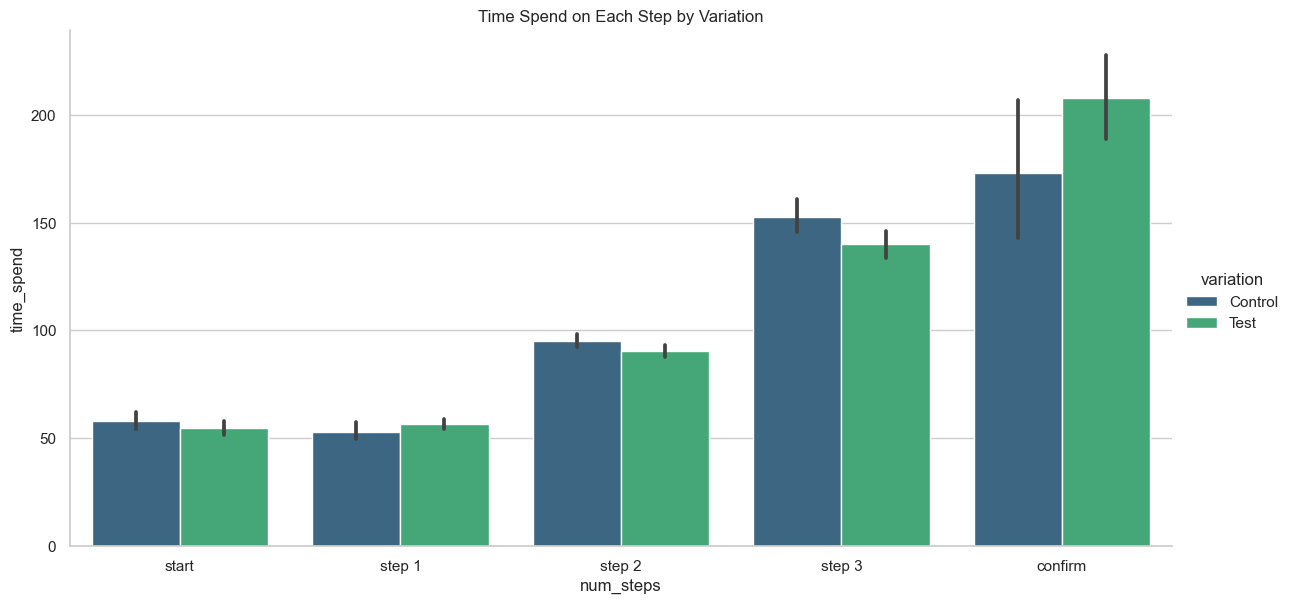

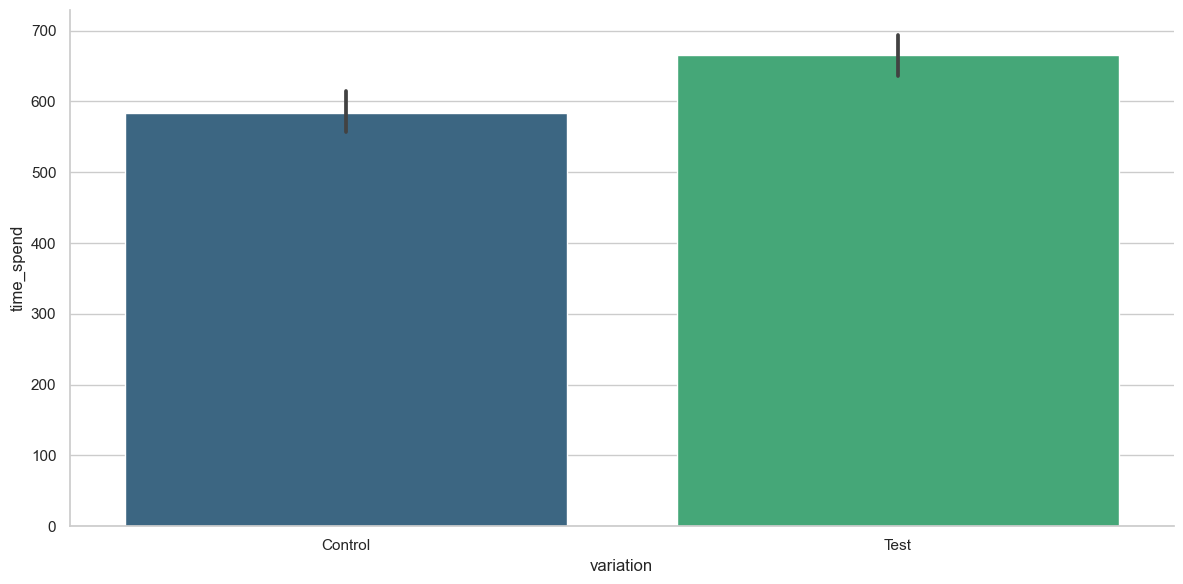

In [65]:
# each client the average time spend on each step by variation
df_web_data_grouped_client = final_df.groupby(['variation', 'client_id', 'num_steps'])['time_spend'].mean().reset_index()


# using seaborn catplot to create a grouped bar chart
sns.catplot(x='num_steps', y='time_spend', hue='variation', data=df_web_data_grouped_client , kind='bar', height=6, aspect=2, palette = 'viridis')
plt.title('Time Spend on Each Step by Variation')
plt.xticks([0, 1, 2,3, 4], ['start','step 1', 'step 2', 'step 3', 'confirm'])
plt.show()

# caculate the average sum of time spend of all steps by variation

df_web_data_grouped_client_sum = final_df.groupby(['variation', 'client_id'])['time_spend'].sum().reset_index()

# using seaborn catplot to create a grouped bar chart
sns.catplot(x='variation', y='time_spend', data=df_web_data_grouped_client_sum, kind='bar', height=6, aspect=2, palette = 'viridis')



delete outlier of confirm step 

In [64]:
df_web_data_grouped_client

,variation,client_id,num_steps,time_spend
0,Control,1104,0,NaN
1,Control,1186,0,11.0
2,Control,1186,1,11.0
3,Control,1186,2,NaN
4,Control,3647,0,14.0
...,...,...,...,...
42555,Test,9998964,0,NaN
42556,Test,9998964,1,16.0
42557,Test,9998964,2,107.0
42558,Test,9998964,3,74.0


In [ ]:
final_df

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,num_steps,time_diff,time_spend,error
70411,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,0,0.0,7.0,nan
70410,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,1,7.0,32.0,nan
70409,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,2,32.0,99.0,nan
70408,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,3,99.0,20.0,nan
70407,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,4,20.0,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273814,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,2,10.0,39.0,nan
273813,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,3,39.0,21.0,nan
273812,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,4,21.0,NaN,nan
243575,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,0,0.0,8.0,nan


In [ ]:
final_df[final_df['num_steps'] == 4]

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,num_steps,time_diff,time_spend,error
70407,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,4,20.0,NaN,nan
135183,647,66758770_53988066587,40369564_40101682850_311847,confirm,2017-04-12 15:47:45,Test,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,4,163.0,NaN,nan
13071,1195,766842522_69992551638,393817425_39015278493_996341,confirm,2017-04-05 20:19:31,Control,21.0,262.0,54.5,M,2.0,28457.96,2.0,5.0,4,83.0,NaN,nan
31031,1197,753759429_54481946928,71862471_21202285428_848395,confirm,2017-04-01 17:17:59,Control,7.0,85.0,28.5,U,5.0,177062.14,5.0,8.0,4,17.0,NaN,nan
305318,1336,920624746_32603333901,583743392_96265099036_939815,confirm,2017-05-08 06:08:43,Test,48.0,576.0,42.0,M,4.0,130537.18,6.0,9.0,4,109.0,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133538,9998851,660529049_81285947655,310744937_17135608286_213964,confirm,2017-04-05 12:08:43,Test,4.0,58.0,23.5,U,2.0,38473.54,3.0,6.0,4,31.0,NaN,nan
97102,9998964,502193753_63097042630,699981922_52880598802_858635,confirm,2017-04-05 23:50:02,Test,5.0,71.0,45.5,U,3.0,91766.49,6.0,9.0,4,74.0,NaN,nan
38807,9999009,212849256_28644888524,149965839_24823291142_245569,confirm,2017-03-31 07:20:36,Test,18.0,216.0,68.5,M,3.0,2055381.29,6.0,9.0,4,118.0,NaN,nan
177478,9999400,915967319_19082377501,288904166_90826265353_276104,confirm,2017-04-20 05:23:27,Test,7.0,86.0,28.5,U,2.0,51787.04,0.0,3.0,4,24.0,NaN,nan


In [ ]:
# using pivot table to create a table for the average time spend on each step by variation also the sum of the time spend

df_web_data_pivot = df_web_data_grouped_client.pivot_table(index='num_steps', columns='variation', values='time_spend').agg(['mean' , 'sum'])
df_web_data_pivot

NameError: name 'df_web_data_grouped_client' is not defined

In [ ]:
df_web_data_grouped_client.groupby(['variation', 'num_steps'])['time_spend'].mean().unstack()

In [ ]:
# the average total time spend on all steps by variation showing

df_web_data_grouped_client.groupby(['variation'])['time_spend'].sum()

# Mark the error

In [ ]:
df_num_steps

In [ ]:
final_df['error'] = np.where((final_df['visit_id'] == final_df['visit_id'].shift(1)) & (final_df['num_steps'] <= final_df['num_steps'].shift(1)), 'error', 'nan')


<Axes: xlabel='error', ylabel='count'>

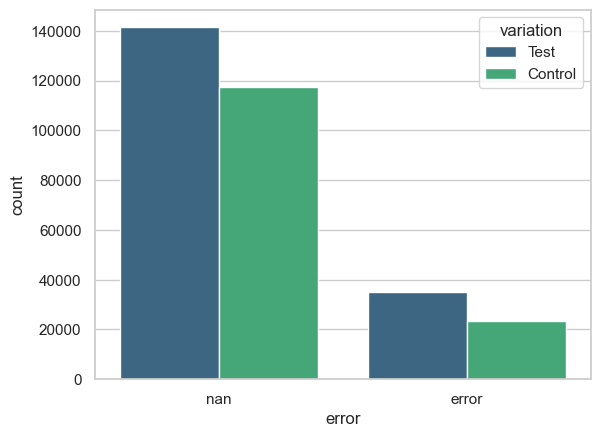

In [ ]:
# show a countplot of the error column by variation
sns.countplot(x='error', data=final_df, hue='variation', palette='viridis')

In [ ]:
# show error by num_steps and variation
df_web_data_error = final_df[final_df['error'] == 'error']
df_web_data_error_grouped = df_web_data_error.groupby(['variation', 'num_steps'])['error'].count().reset_index()
df_web_data_error_grouped

# caculate the proportion of the error by variation by each step
df_web_data_error_grouped['total_error'] = df_web_data_error_grouped.groupby('variation')['error'].transform('sum')
df_web_data_error_grouped['proportion'] = df_web_data_error_grouped['error'] / df_web_data_error_grouped['total_error']
df_web_data_error_grouped

,variation,num_steps,error,total_error,proportion
0,Control,0,14426,23206,0.621650
1,Control,1,3489,23206,0.150349
2,Control,2,3201,23206,0.137938
3,Control,3,851,23206,0.036672
4,Control,4,1239,23206,0.053391
5,Test,0,22686,35212,0.644269
6,Test,1,4982,35212,0.141486
7,Test,2,2862,35212,0.081279
8,Test,3,898,35212,0.025503
9,Test,4,3784,35212,0.107463


In [ ]:
final_df

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,num_steps,time_diff,time_spend,error
70411,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,0,0.0,7.0,nan
70410,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,1,7.0,32.0,nan
70409,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,2,32.0,99.0,nan
70408,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,3,99.0,20.0,nan
70407,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,4,20.0,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273814,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,2,10.0,39.0,nan
273813,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,3,39.0,21.0,nan
273812,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,4,21.0,NaN,nan
243575,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,0,0.0,8.0,nan


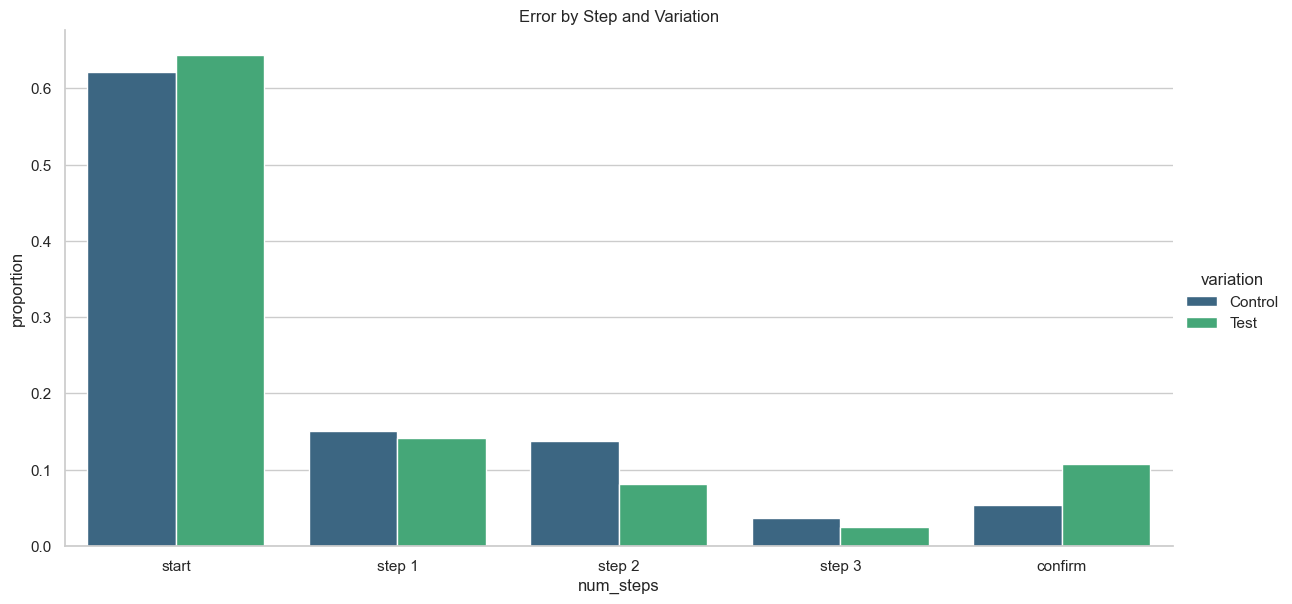

In [ ]:
# using seaborn catplot to create a grouped bar chart
sns.catplot(x='num_steps', y='proportion', hue='variation', data=df_web_data_error_grouped, kind='bar', height=6, aspect=2, palette = 'viridis')
plt.title('Error by Step and Variation')
plt.xticks([0, 1, 2,3, 4], ['start','step 1', 'step 2', 'step 3', 'confirm'])
plt.show()


# Hypothesis Testing

Given the data and KPIs you have explored discussed, one interesting hypothesis to test is related to the completion rate between the Test and Control groups. 

Since the new design (Test group) had a higher completion rate compared to the old design (Control group), you are required to confirm if this difference is statistically significant.

Make sure to define the proper null and an alternative hypothesis to test it. 

Use the provided data to test these hypotheses, and determine if you can reject the null hypothesis in favor of the alternative. 

Make sure to consider the significance level, p-value, the statistical test prerequisites, and other relevant statistical measures in your analysis.

In [ ]:
df_num_steps

,client_id,0,1,2,3,4,Variation,completed
0,555,1,1,1,1,1,Test,True
1,647,1,1,1,1,1,Test,True
2,934,4,0,0,0,0,Test,False
3,1028,1,5,2,1,0,Control,False
4,1104,2,0,0,0,0,Control,False
...,...,...,...,...,...,...,...,...
50482,9999150,2,1,0,0,0,Test,False
50483,9999400,1,1,1,1,1,Test,True
50484,9999626,1,1,0,0,0,Test,False
50485,9999729,4,3,2,1,1,Test,True


In [ ]:
df_num_steps['Variation'].value_counts()

Variation
Test       26961
Control    23526
Name: count, dtype: int64

In [ ]:
completed_variation

Variation,Control,Test,prob_control,prob_test
completed,,,,
False,8098,8279,0.344215,0.307073
True,15428,18682,0.655785,0.692927


In [ ]:
df_test = df_num_steps[df_num_steps["Variation"]=="Test"]["completed"]
df_control = df_num_steps[df_num_steps["Variation"]=="Control"]["completed"]

### using one sample test - one category - varirance

In [ ]:
#Set the hypothesis

#H0: Test Group completion rate <= Control Group completion rate
#H1: Test Group completion rate > Control

#significance level = 0.05

In [ ]:
import scipy.stats as st
st.ttest_ind(df_test,df_control, equal_var='less')
t_stat, p_value = st.ttest_ind(df_test, df_control, equal_var=False)
t_stat, p_value


(8.881675533296761, 6.803126719143481e-19)

Because p_value is lower than significance level, we reject the null hypothesis, that means Test Group Completion rate is higher than Control

The introduction of a new UI design comes with its associated costs: design, development, testing, potential training for staff, and possible short-term disruptions or adjustments for users. To justify these costs, Vanguard has determined that any new design should lead to a minimum increase in the completion rate to be deemed cost-effective.

Threshold: Vanguard has set this minimum increase in completion rate at 5%. This is the rate at which the projected benefits, in terms of increased user engagement and potential revenue, are estimated to outweigh the costs of the new design.

You are required to carry out another analysis, ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold. If the new design doesn’t lead to at least this level of improvement, it may not be justifiable from a cost perspective, regardless of its statistical significance.

In [ ]:

# set the hypothesis
# H0: Test Group completion rate < = 0.05
# H1: Test Group completion rate >  0.05

In [ ]:
st.ttest_1samp(df_test, 0.05, alternative = "greater")

TtestResult(statistic=228.8531308755535, pvalue=0.0, df=26960)

Design Effectiveness
Was the experiment well-structured?

Were clients randomly and equally divided between the old and new designs?

Were there any biases?

Duration Assessment
Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?

Additional Data Needs
What other data, if available, could enhance the analysis?




In [ ]:
df_num_steps

,client_id,0,1,2,3,4,Variation,completed
0,555,1,1,1,1,1,Test,True
1,647,1,1,1,1,1,Test,True
2,934,4,0,0,0,0,Test,False
3,1028,1,5,2,1,0,Control,False
4,1104,2,0,0,0,0,Control,False
...,...,...,...,...,...,...,...,...
50482,9999150,2,1,0,0,0,Test,False
50483,9999400,1,1,1,1,1,Test,True
50484,9999626,1,1,0,0,0,Test,False
50485,9999729,4,3,2,1,1,Test,True


In [ ]:
# set a date range for the data, start date os 3/15/2017 and end date is 6/20/2017

start_date = '2017-03-15'
end_date = '2017-06-20'

# only select the data within the date range
df_date = final_df[(final_df['date_time'] >= start_date) & (final_df['date_time'] <= end_date)]

